---
title: Euler-Bernoulli Beams
---

The relationship between the bending moment and the radius of curvature($\rho$) for a beam of Young's modulus $E$ and cross-sectional moment of inertia(second moment of area) $I$ is given by 

$$
M=-\frac{EI}{\rho}
$$

Now let's say $\omega(x)$ describes the deflection of a beam in the z direction as a function of its length, $x$.  When deflections are small -- assumed in the Euler-Bernoulli model, then the second derivative can serve as an approximate the radius of curvature (using the small angle approximation $\sin{\theta}=\theta$), making

$$\frac{1}{\rho} = \frac{\delta^2\omega}{\delta x^2}$$

and

$$M = -EI\frac{\delta^2 \omega(x)}{\delta x^2}$$

$$\frac{\delta^2}{\delta x^2}\left(EI\frac{\delta^2 \omega(x)}{\delta x^2}\right) = p(x)$$

where $p$ is a distributed load, $E$ is Young's Modulus, and $I$ is the 

$$\frac{\delta^2 \omega}{\delta x^2} =\frac{M}{EI}$$

where $M$ is the moment, 

In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
"""
copyright 2016-2017 Dan Aukes
"""
import matplotlib.pyplot as plt
import sympy
import numpy
from sympy import pi
b,h,theta,P,L,E,I,x,w,M,q,p,A,B,C,D,p0,M0=sympy.symbols('b,h,theta,P,L,E,I,x,w,M,q,p,A,B,C,D,p0,M0')

In [3]:
def plot_x(w,subs1=None):
    subs1 = subs1 or {}
    w = w.subs(subs1)
    unit = dict([(item,1) for item in w.atoms(sympy.Symbol) if item!=x])
    unit.update(subs1)
    w_num = w.subs(unit)
    f_w = sympy.lambdify(x,w_num)

    xn = numpy.r_[0:unit[L]:100j]
    yn = f_w(xn)

    plt.plot(xn,yn)
    plt.axis('equal')

First we need to compute $M(x)$, the moment on the beam as a function of the loading.


In [4]:
M_dd = p

In [5]:
M_d = sympy.integrate(M_dd,(x,0,x)) + A
M_d

A + p*x

In [6]:
M = sympy.integrate(M_d,(x,0,x)) + B
M

A*x + B + p*x**2/2

In [7]:
w_d = sympy.integrate(M/E/I,(x,0,x)) + C
w_d

A*x**2/(2*E*I) + B*x/(E*I) + C + p*x**3/(6*E*I)

In [8]:
w = sympy.integrate(w_d,(x,0,x)) + D
w

A*x**3/(6*E*I) + B*x**2/(2*E*I) + C*x + D + p*x**4/(24*E*I)

For a point load $P$ exerted on a beam at length ($x=l$), the moment can be expressed as:

$$M(x) = P(l-x)$$

In [9]:
eq1 = M_d.subs({x:L}) - P
eq2 = M.subs({x:L}) - 0
eq3 = w_d.subs({x:0}) - 0
eq4 = w.subs({x:0}) - 0
eq5 = M_dd - 0
sol =sympy.solve([eq1,eq2,eq3,eq4,eq5],(A,B,C,D,p))
sol

{A: P, B: -L*P, p: 0, C: 0, D: 0}

In [10]:
w2 = w.subs(sol)
w2.simplify()

P*x**2*(-3*L + x)/(6*E*I)

In [11]:
w_d2 = w_d.subs(sol)
w_d2.simplify()

P*x*(-2*L + x)/(2*E*I)

In [12]:
M2=M.subs(sol)
M2.simplify()

P*(-L + x)

In [13]:
w_max = w2.subs({x:L})
w_max.simplify()

-L**3*P/(3*E*I)

In [14]:
w_max = w_max.subs({I:b*h**3/12})
w_max.subs({b:.01,h:.01,E:1e7,L:.1,P:.1})

-0.00400000000000000

Now we can turn this process into a function

In [15]:
def calc_beam_equations(pp,E,I,eq):
    M_dd = pp
    M_d = sympy.integrate(M_dd,(x,0,x)) + A
    M = sympy.integrate(M_d,(x,0,x)) + B
    w_d = sympy.integrate(M/E/I,(x,0,x)) + C
    w = sympy.integrate(w_d,(x,0,x)) + D

    eq1 = M_d.subs(eq[0][0]) - eq[0][1]
    eq2 = M.subs(eq[1][0]) - eq[1][1]
    eq3 = w_d.subs(eq[2][0]) - eq[2][1]
    eq4 = w.subs(eq[3][0]) - eq[3][1]
    eq = [eq1,eq2,eq3,eq4]    
    
    sol =sympy.solve(eq,(A,B,C,D))

    w2 = w.subs(sol)
    w2 = w2.simplify()

    w_d2 = w_d.subs(sol)
    w_d2 = w_d2.simplify()

    M2=M.subs(sol)
    M2 = M2.simplify()

    return w2,w_d2,M2

Repeating the point load

In [16]:
eq1 = {x:L},P
eq2 = {x:L},0
eq3 = {x:0},0
eq4 = {x:0},0
eq = [eq1,eq2,eq3,eq4]

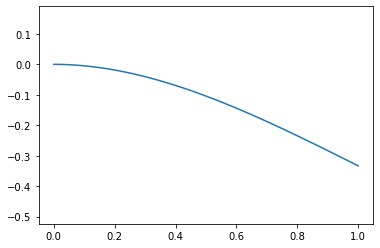

In [17]:
w,w_d,M = calc_beam_equations(0,E,I,eq)
plot_x(w)

For a distibuted load $p(x)$, 


In [18]:
eq1 = {x:L},0
eq2 = {x:L},0
eq3 = {x:0},0
eq4 = {x:0},0
eq = [eq1,eq2,eq3,eq4]

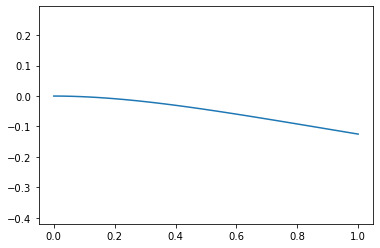

In [19]:
w,w_d,M = calc_beam_equations(-p,E,I,eq)
plot_x(w)

In [20]:
w

p*x**2*(-6*L**2 + 4*L*x - x**2)/(24*E*I)

In [21]:
w_d

p*x*(-3*L**2 + 3*L*x - x**2)/(6*E*I)

In [22]:
M

p*(-L**2 + 2*L*x - x**2)/2

In [23]:
w_max = w.subs({x:L})
w_max.simplify()

-L**4*p/(8*E*I)

For a distributed load where $p = p_0\frac{L-x}{L}$, the boundary conditions stay the same but the function is different

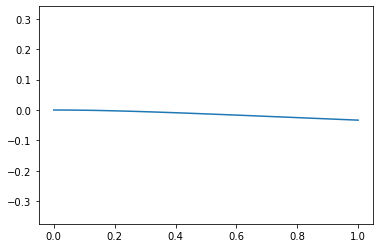

In [24]:
w,w_d,M = calc_beam_equations(-(p0/L*(L-x)),E,I,eq)
plot_x(w)

In [25]:
w

p0*x**2*(5*L*(-2*L**2 + 2*L*x - x**2) + x**3)/(120*E*I*L)

In [26]:
w_d

p0*x*(2*L*(-2*L**2 + 3*L*x - 2*x**2) + x**3)/(24*E*I*L)

In [27]:
M

p0*(L*(-L**2 + 3*L*x - 3*x**2) + x**3)/(6*L)

In [28]:
w_max = w.subs({x:L})
w_max.simplify()

-L**4*p0/(30*E*I)

In [29]:
eq1 = {x:L},P
eq2 = {x:L},0
eq3 = {x:0},0
eq4 = {x:0},0
eq = [eq1,eq2,eq3,eq4]

Now what about a cross sectional area that changes as a function of x?  As we know, the cross sectional moment of inertia $I$ for a rectangular beam of width $b$ and thickness $h$ is $$I=\frac{bh^3}{12}$$.  If we make b a function of x, for example $b(x)=L-x$, what happens to the curvature?

In [30]:
b2=(L-x)
I2 = b2*h**3/12

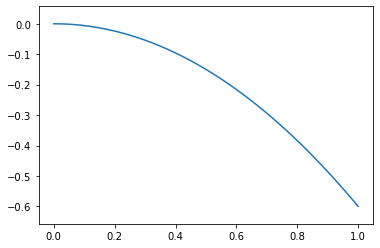

In [31]:
w,w_d,M = calc_beam_equations(0,E,I2,eq)
plot_x(w,{P:.1,L:1})

In [32]:
w

-6*P*x**2/(E*h**3)

In [33]:
w_d

-12*P*x/(E*h**3)

In [34]:
M

P*(-L + x)

As you can see it grows linearly as a function of x.  Therefore, a cross section that decreases linearly is good at equalizing the radius of curvature (and the stresses) in a beam

In [35]:
eq1 = {x:L},P
eq2 = {x:L},0
eq3 = {x:0},0
eq4 = {x:0},0
eq = [eq1,eq2,eq3,eq4]

In [36]:
I2 = b*h**3/12

In [37]:
w,w_d,M = calc_beam_equations(0,E,I2,eq)
subs1 = {b:.01,h:.01,E:1e7,L:.1,P:.1}
w = w.subs(subs1)
w

2.0*x**2*(x - 0.3)

In [38]:
w_max = w.subs({x:.1})
w_max

-0.00400000000000000

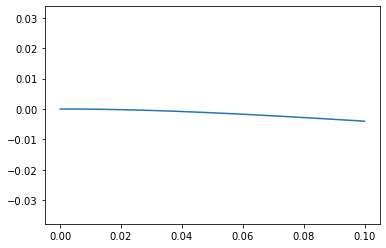

In [39]:
plot_x(w,subs1)